<a href="https://colab.research.google.com/github/FaradillaRoudhotulSanaa/PCVK_Ganjil_2024/blob/main/Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul 10 - Thresholding

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Import library

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

## Global Threshold

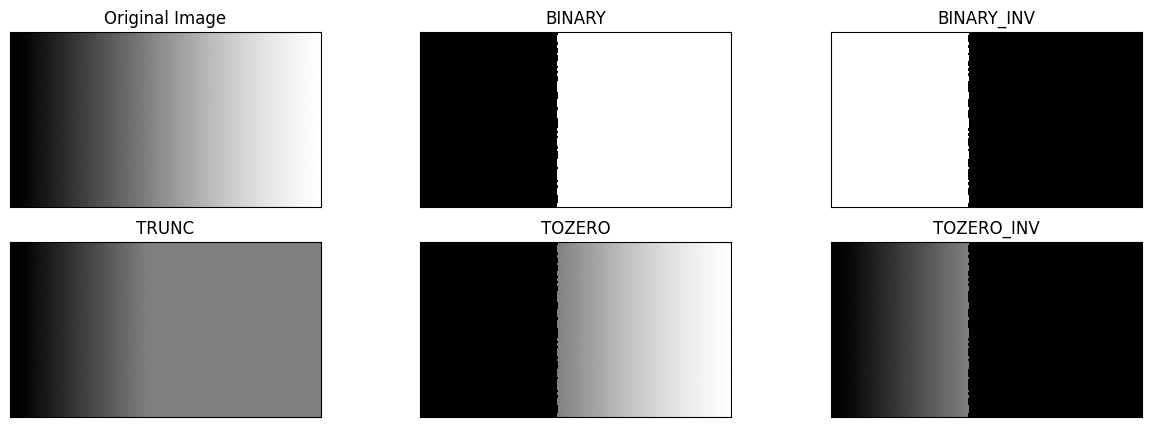

In [21]:
filename = ('/content/drive/MyDrive/PCVK/Assets/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selainitu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()


## Adaptive Threshold

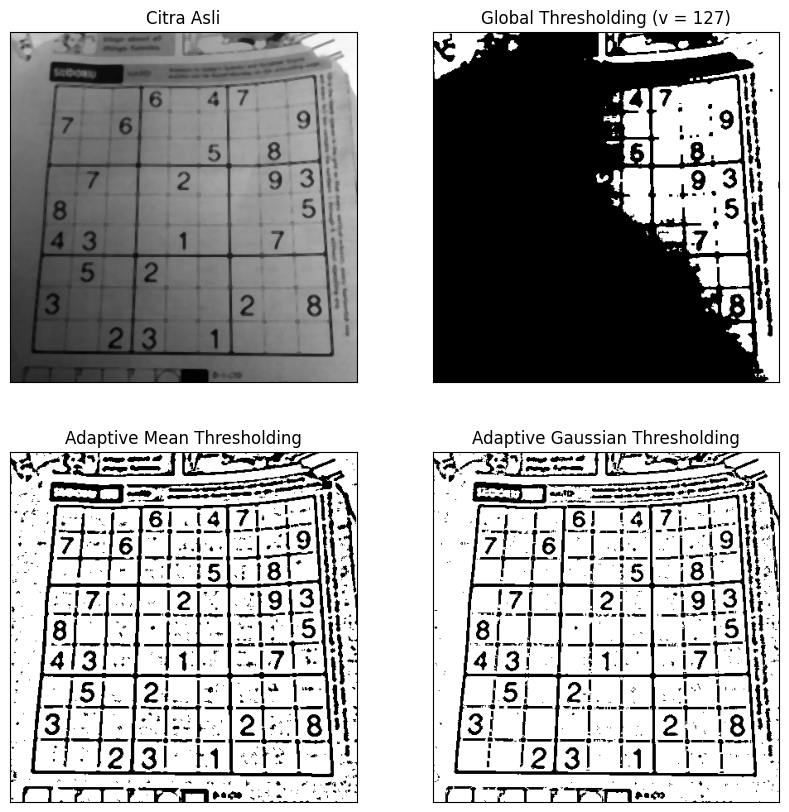

In [23]:
filename = ('/content/drive/MyDrive/PCVK/Assets/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

## Otsu's Threshold

**Otsu's dengan library OpenCV**

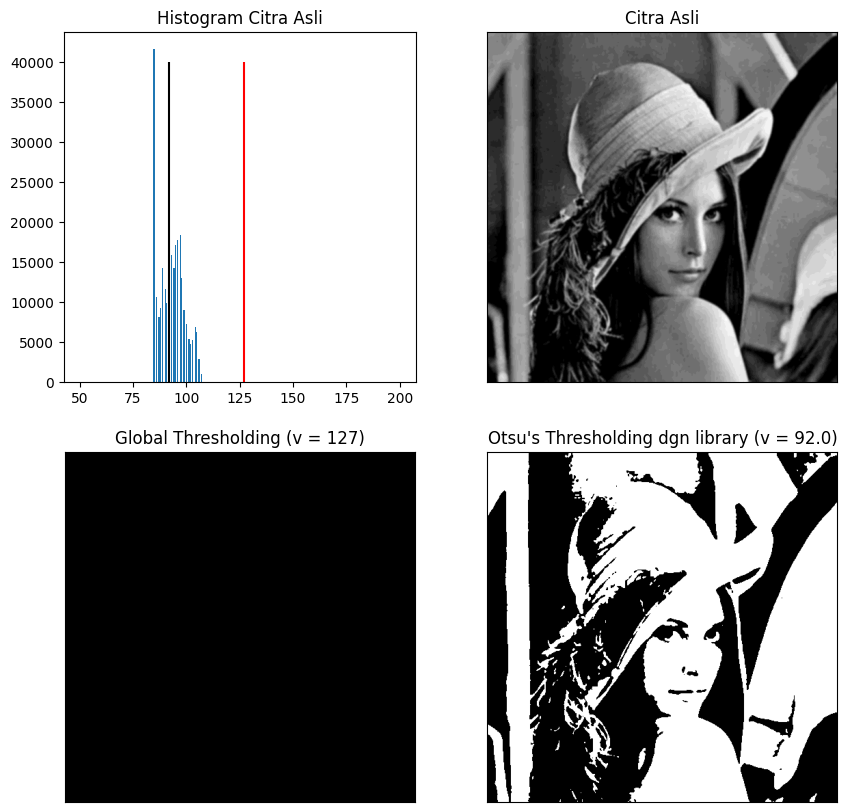

In [24]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Assets/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

**Otsu's tanpa Gaussian Filter dan dengan Gaussian Filter**

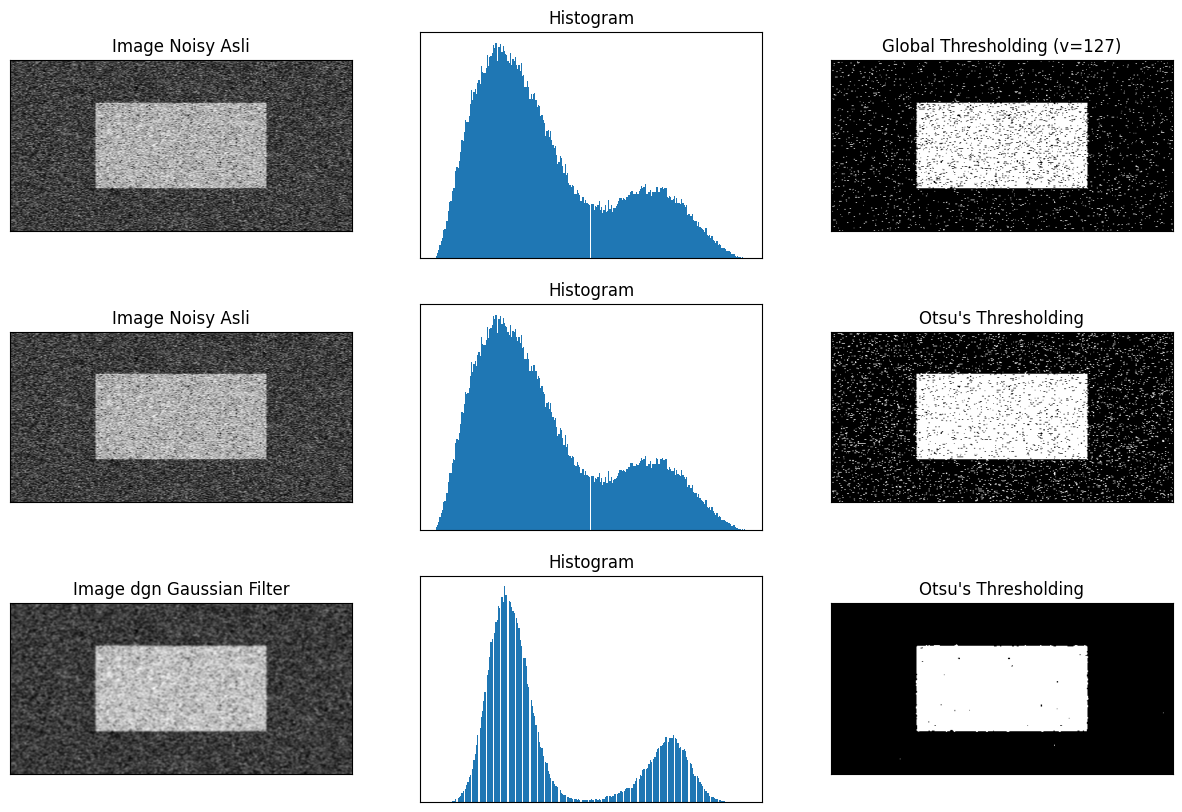

In [25]:
filename = ('/content/drive/MyDrive/PCVK/Assets/noisy2.png')

img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
 'Image Noisy Asli','Histogram',"Otsu's Thresholding",
 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]

plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


## Segmentasi Citra menggunakan K-Means


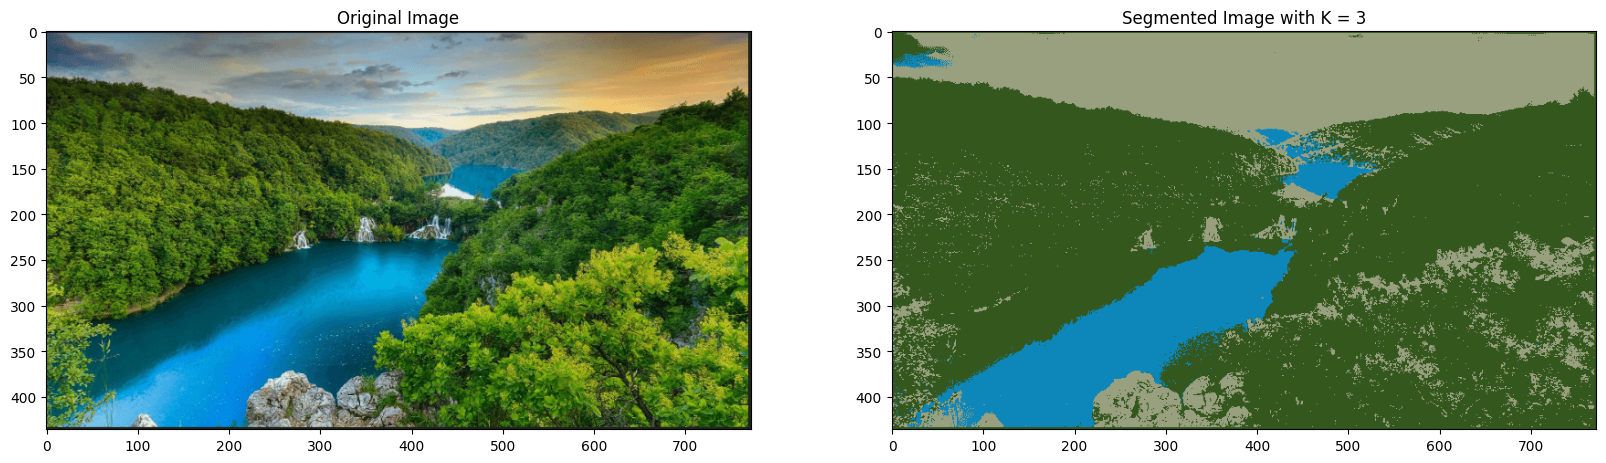

In [28]:
# Load the image and convert to RGB
filename = '/content/drive/MyDrive/PCVK/Assets/jungle.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape image to 2D array of pixels
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float

# Define criteria for KMeans
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Set the number of clusters (k = 3 for green, blue, and white/orange)
k = 3
compactness, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values (RGB format)
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Map the original pixels to the color of their respective center
segmented_image = centers[labels]

# Reshape the image back to its original dimensions
segmented_image = segmented_image.reshape(img.shape)

# Plot the original and segmented images
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image with K = 3')

plt.show()

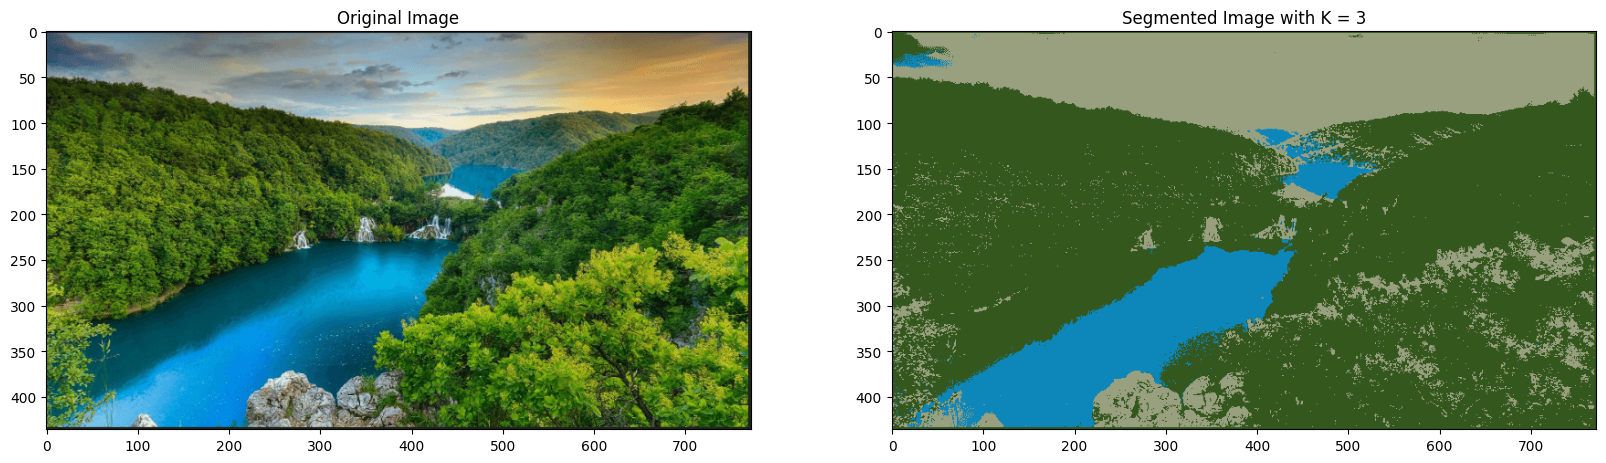

(<Axes: >, <matplotlib.image.AxesImage at 0x7e71fa363820>)

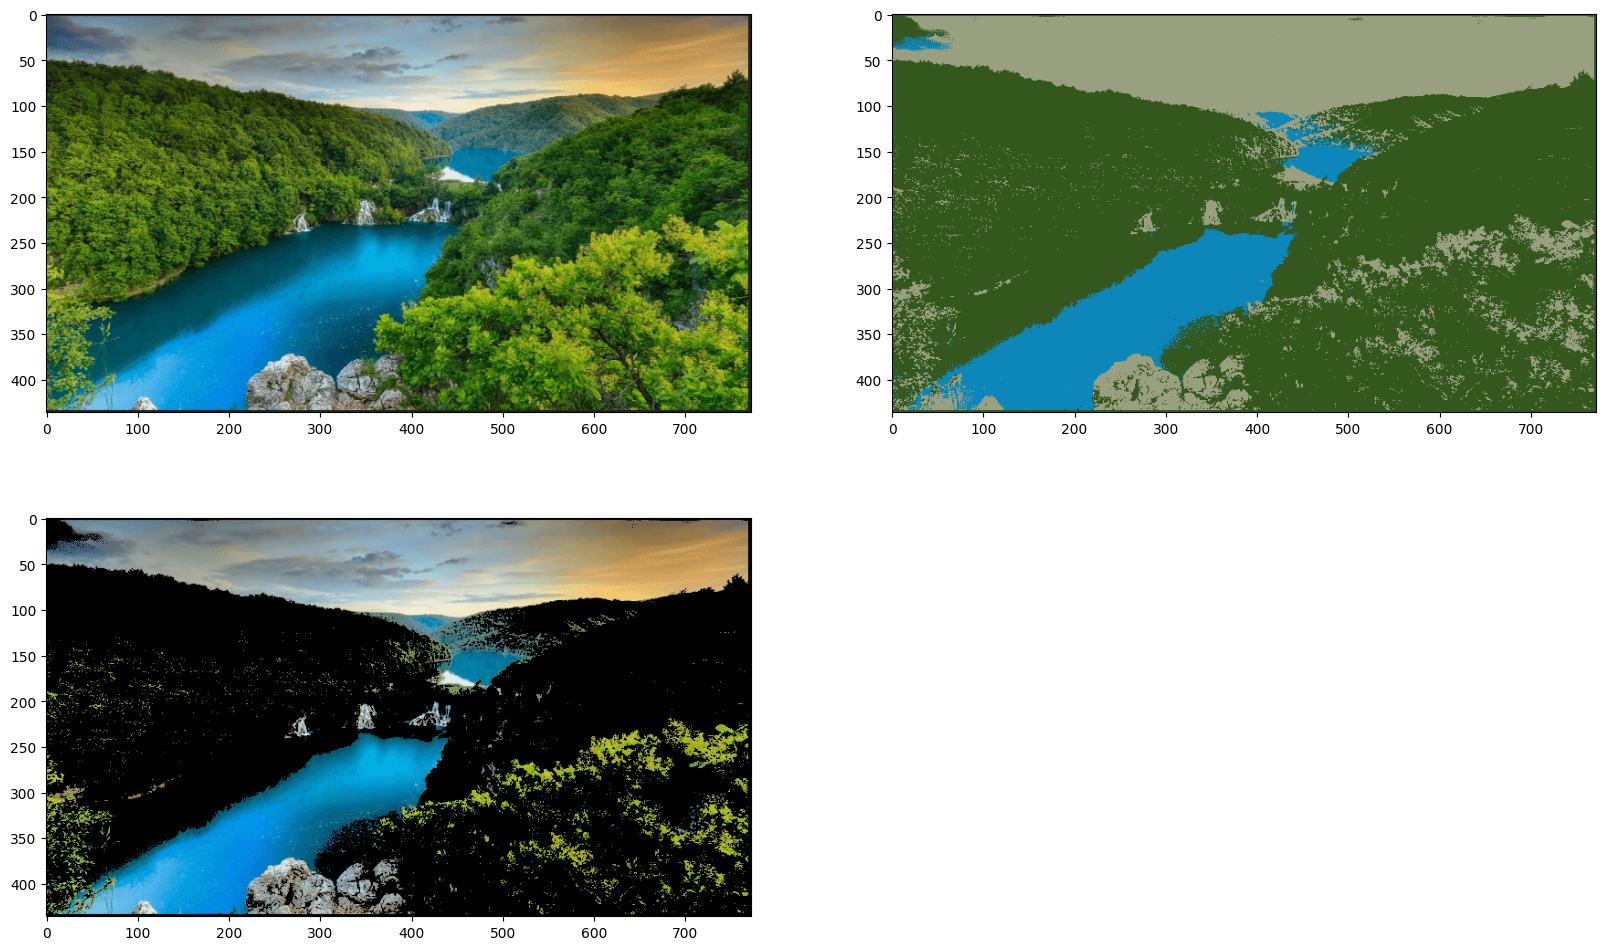

In [29]:
# Load the image and convert to RGB
filename = '/content/drive/MyDrive/PCVK/Assets/jungle.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape image to 2D array of pixels
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float

# Define criteria for KMeans
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Set the number of clusters (k = 3 for green, blue, and white/orange)
k = 3
compactness, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values (RGB format)
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Map the original pixels to the color of their respective center
segmented_image = centers[labels]

# Reshape the image back to its original dimensions
segmented_image = segmented_image.reshape(img.shape)

# Plot the original and segmented images
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image with K = 3')

plt.show()

# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)


## Tugas Praktikum

1. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.


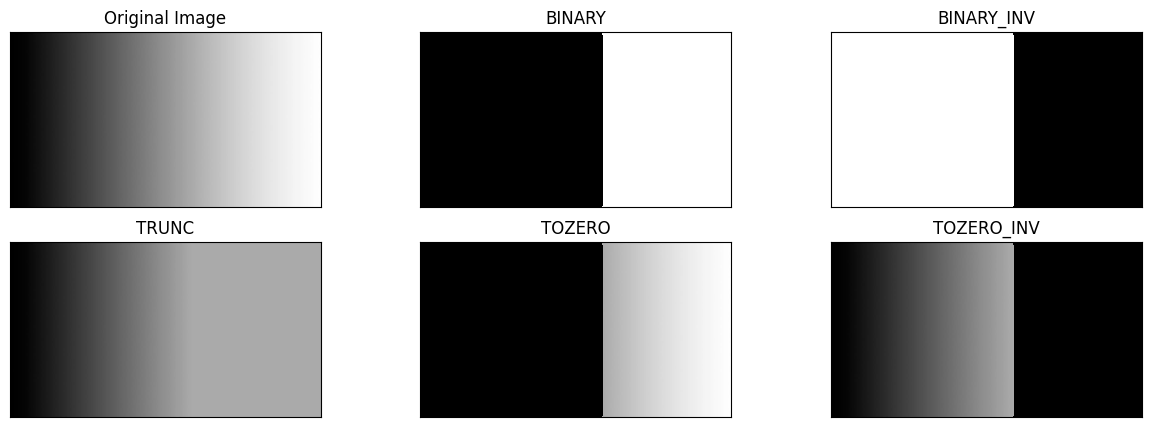

In [4]:
filename = ('/content/drive/MyDrive/PCVK/Assets/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()


2. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

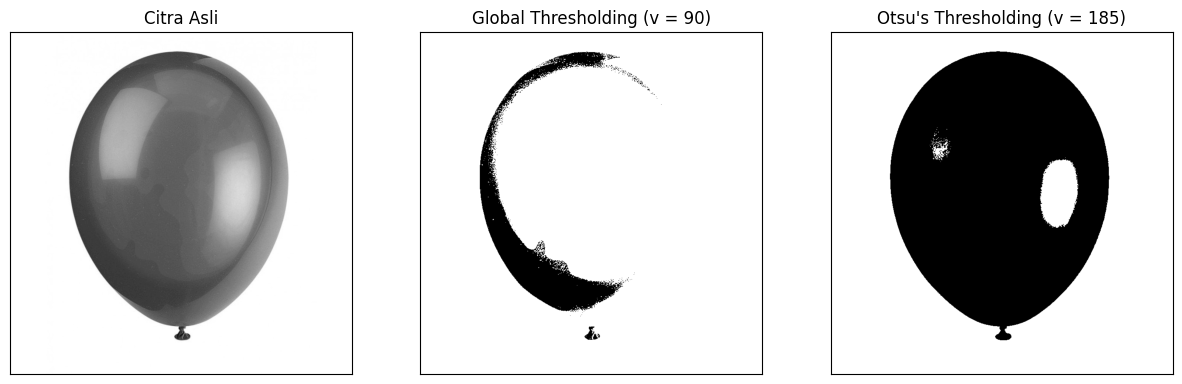

In [14]:
# Load the image in grayscale (balloon.jpg)
filename = '/content/drive/MyDrive/PCVK/Assets/balloon.jpg'
image = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Function to compute Otsu's threshold
def otsu_threshold(image):
    # Histogram of pixel intensities
    hist, bin_edges = np.histogram(image.flatten(), bins=256, range=(0, 256))

    # Total number of pixels
    total_pixels = image.size

    # Calculate the probability of each intensity level
    prob = hist / total_pixels

    # Initialize variables
    max_var_between = 0
    optimal_threshold = 0
    sum_all = 0
    sum_background = 0
    weight_background = 0
    weight_foreground = 0

    for i in range(256):
        sum_all += i * hist[i]

    for threshold in range(256):
        weight_background += hist[threshold]
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += threshold * hist[threshold]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_all - sum_background) / weight_foreground

        # Between class variance
        var_between = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Check if new maximum found
        if var_between > max_var_between:
            max_var_between = var_between
            optimal_threshold = threshold

    return optimal_threshold

# Apply Otsu's thresholding
otsu_thresh_value = otsu_threshold(image)

# Apply global thresholding (v = 90)
_, global_thresh_img = cv.threshold(image, 90, 255, cv.THRESH_BINARY)

# Apply Otsu's threshold (calculated manually)
_, otsu_thresh_img = cv.threshold(image, otsu_thresh_value, 255, cv.THRESH_BINARY)

# Display the original, global threshold, and Otsu's threshold images
titles = ['Citra Asli', 'Global Thresholding (v = 90)', f"Otsu's Thresholding (v = {otsu_thresh_value})"]
images = [image, global_thresh_img, otsu_thresh_img]

plt.figure(figsize=(15, 5))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


3. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:

* Anda dapat gunakan cv.calcHist untuk menampilkan histogram.
* Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
* Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).


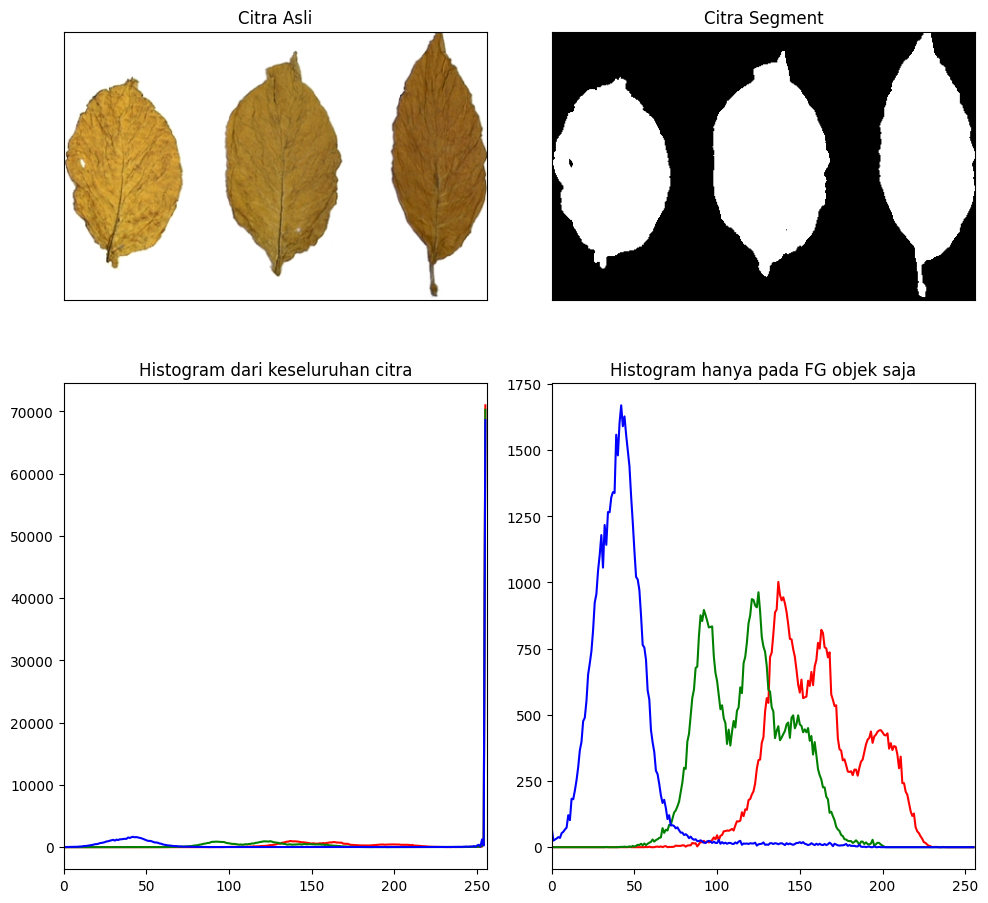

In [17]:
# Load the image after verifying the correct path
filename = '/content/drive/MyDrive/PCVK/Assets/tobacco.jpg'

img = cv.imread(filename)
if img is None:
    print("Error: Image not found. Check the file path.")
else:
    # Convert the image to RGB and grayscale
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # Create a mask using thresholding
    ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

    # Prepare the figure
    plt.figure(figsize=(10, 10))

    # Display the original image
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.title('Citra Asli')
    plt.xticks([]), plt.yticks([])

    # Display the segmented image (mask)
    plt.subplot(2, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Citra Segment')
    plt.xticks([]), plt.yticks([])

    # Colors for the RGB channels
    color = ('r', 'g', 'b')

    # Plot histogram for the entire image
    plt.subplot(2, 2, 3)
    for i, col in enumerate(color):
        hist_full = cv.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist_full, color=col)
    plt.title('Histogram dari keseluruhan citra')
    plt.xlim([0, 256])

    # Plot histogram for the foreground (masked) image
    plt.subplot(2, 2, 4)
    for i, col in enumerate(color):
        hist_masked = cv.calcHist([img], [i], mask, [256], [0, 256])
        plt.plot(hist_masked, color=col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0, 256])

    # Show the plot
    plt.tight_layout()
    plt.show()


4. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

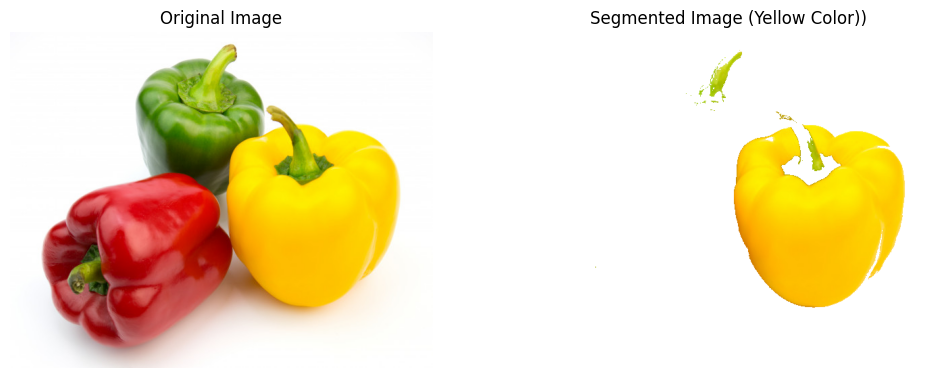

In [20]:
# Load the image
filename = '/content/drive/MyDrive/PCVK/Assets/peppers.jpg'
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
pixel_values = img_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria, number of clusters(K) and apply KMeans
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Number of clusters
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values
centers = np.uint8(centers)
labels = labels.flatten()

# Map each pixel to the centroid (color) representing its cluster
segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img_rgb.shape)


yellow_cluster_index = np.argmin(np.linalg.norm(centers - [255, 255, 0], axis=1))
mask = (labels == yellow_cluster_index)

# Create an image that highlights only the yellow parts with a white background
highlighted_image = np.full_like(img_rgb, fill_value=255)
highlighted_image[mask.reshape(img_rgb.shape[:2])] = img_rgb[mask.reshape(img_rgb.shape[:2])]

# Display the original image and the segmented image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(highlighted_image)
plt.title('Segmented Image (Yellow Color))')
plt.axis('off')

plt.show()


5. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.


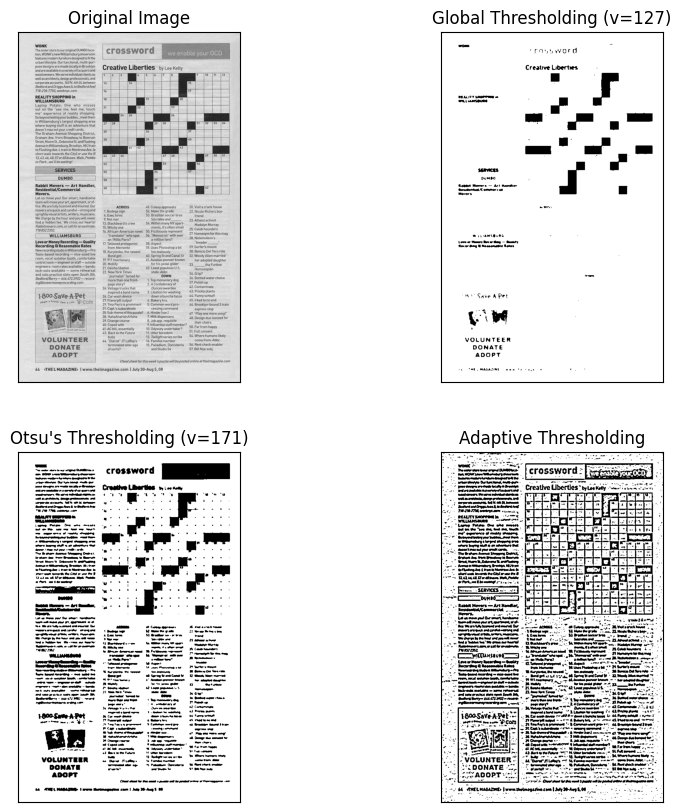

In [30]:
# Muat gambar crossword.jpg dan ubah ke grayscale
filename = '/content/drive/MyDrive/PCVK/Assets/crossword.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

# Aplikasikan Gaussian Blur untuk mengurangi noise
blur = cv.GaussianBlur(img, (5, 5), 0)

# Lakukan thresholding dengan metode Global Thresholding
ret, thresh_global = cv.threshold(blur, 127, 255, cv.THRESH_BINARY)

# Lakukan Otsu's Thresholding (ini secara otomatis menghitung nilai threshold terbaik)
ret2, thresh_otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Lakukan Adaptive Thresholding
thresh_adaptive = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv.THRESH_BINARY, 11, 2)

# Tampilkan hasil thresholding
titles = ['Original Image', 'Global Thresholding (v=127)', "Otsu's Thresholding (v=%d)" % ret2, 'Adaptive Thresholding']
images = [img, thresh_global, thresh_otsu, thresh_adaptive]

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
